In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install pycocotools

  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 3.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [1]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
metric = MeanAveragePrecision()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Imports

import pandas as pd
import numpy as np
import torch
import numpy as np

# Working with Datasets

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

# XZ
import os
import pandas as pd
from torchvision.io import read_image

# Datasets

from torchvision.datasets import VOCDetection

# Visualisation

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import torchvision.transforms as T
from torchvision.utils import draw_bounding_boxes
from IPython.display import clear_output

In [3]:
dataset = VOCDetection('/home/jupyter/mnt/datasets/voc', download=True)

Using downloaded and verified file: /home/jupyter/mnt/datasets/voc/VOCtrainval_11-May-2012.tar
Extracting /home/jupyter/mnt/datasets/voc/VOCtrainval_11-May-2012.tar to /home/jupyter/mnt/datasets/voc


In [4]:
# Working with single dataset object
sample = dataset[0]

In [5]:
sample

(<PIL.Image.Image image mode=RGB size=500x442>,
 {'annotation': {'folder': 'VOC2012',
   'filename': '2008_000008.jpg',
   'source': {'database': 'The VOC2008 Database',
    'annotation': 'PASCAL VOC2008',
    'image': 'flickr'},
   'size': {'width': '500', 'height': '442', 'depth': '3'},
   'segmented': '0',
   'object': [{'name': 'horse',
     'pose': 'Left',
     'truncated': '0',
     'occluded': '1',
     'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
     'difficult': '0'},
    {'name': 'person',
     'pose': 'Unspecified',
     'truncated': '1',
     'occluded': '0',
     'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
     'difficult': '0'}]}})

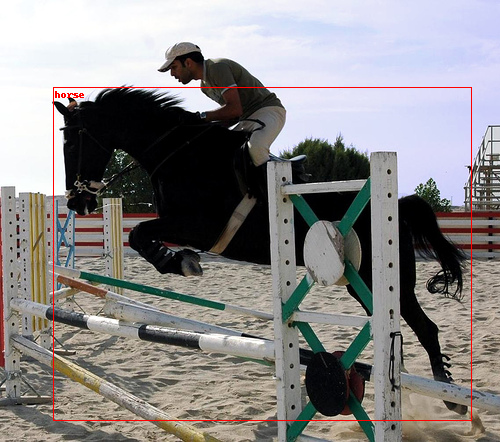

In [6]:
to_tensor = T.ToTensor()
img_as_tensor = to_tensor(sample[0])
img_as_tensor = img_as_tensor*255
img_as_tensor = img_as_tensor.to(torch.uint8)

label_0 = [sample[1]['annotation']['object'][0]['name']]
box = torch.tensor([float(i) for i in sample[1]['annotation']['object'][0]['bndbox'].values()]).unsqueeze(0)

img_with_box_tensor = draw_bounding_boxes(img_as_tensor,box,label_0,colors = ['red'])

to_pil = T.ToPILImage()

to_pil(img_with_box_tensor)

# Разметка нескольких объектов на изображении

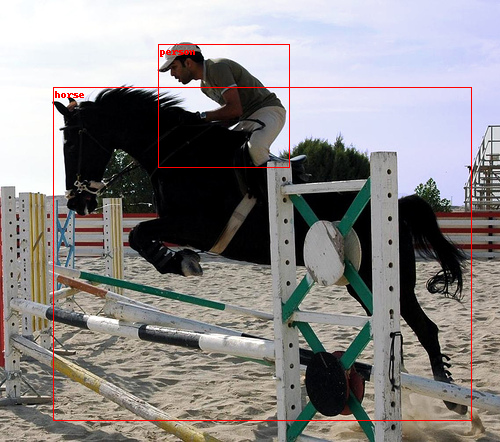

In [7]:
# Working with img
to_tensor = T.ToTensor()
to_pil = T.ToPILImage()
img_as_tensor = to_tensor(sample[0])
img_as_tensor = img_as_tensor*255
img_as_tensor = img_as_tensor.to(torch.uint8)

# Working with labels
labels = []
for obj in (sample[1]['annotation']['object']):
    labels.append(obj['name'])

    
# Working with boxes
box_tensor = None
for idx,obj in enumerate(labels):
    if idx == 0:
        box_tensor = torch.tensor([float(i) for i in sample[1]['annotation']['object'][idx]['bndbox'].values()]).unsqueeze(0)
    else:
        _ = torch.tensor([float(i) for i in sample[1]['annotation']['object'][idx]['bndbox'].values()]).unsqueeze(0)
        box_tensor = torch.cat((box_tensor,_), dim = 0)

img_with_box_tensor = draw_bounding_boxes(img_as_tensor,box_tensor,labels,colors = ['red' for label in labels])

to_pil(img_with_box_tensor)

In [8]:
def show_boxes(sample):
    
    # Working with img
    to_tensor = T.ToTensor()
    img_as_tensor = to_tensor(sample[0])
    img_as_tensor = img_as_tensor*255
    img_as_tensor = img_as_tensor.to(torch.uint8)

    # Working with labels
    labels = []
    for obj in (sample[1]['annotation']['object']):
        labels.append(obj['name'])


    # Working with boxes
    box_tensor = None
    for idx,obj in enumerate(labels):
        if idx == 0:
            box_tensor = torch.tensor([float(i) for i in sample[1]['annotation']['object'][idx]['bndbox'].values()]).unsqueeze(0)
        else:
            _ = torch.tensor([float(i) for i in sample[1]['annotation']['object'][idx]['bndbox'].values()]).unsqueeze(0)
            box_tensor = torch.cat((box_tensor,_), dim = 0)

    img_with_box_tensor = draw_bounding_boxes(img_as_tensor,box_tensor,labels,colors = ['red' for label in labels])

    to_pil = T.ToPILImage()
    
    return to_pil(img_with_box_tensor)

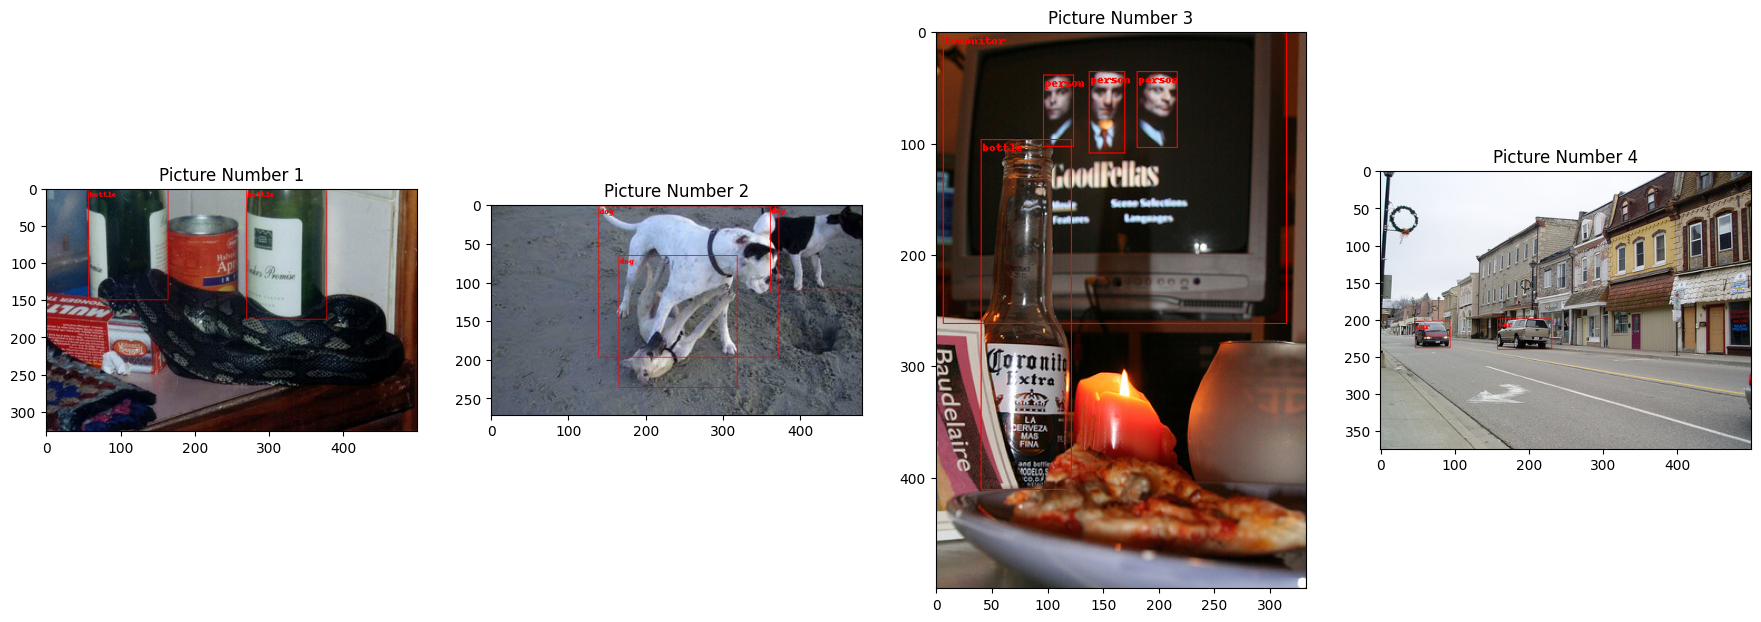

In [9]:
plt.figure(figsize = (22,12))
for sample in range(1,5):
    plt.subplot(1,4,sample)
    plt.imshow(show_boxes(dataset[sample]))
    plt.title(f"Picture Number {sample}")

# Обучение модели

In [10]:
sample = dataset[0]

In [11]:
target_names = []
for obj in dataset:
    target_names += [x['name'] for x in obj[1]['annotation']['object']]

In [12]:
target_names = set(target_names)

# To convert integer to target
target2idx = {name: i for i, name in enumerate(target_names)}
idx2target = {i: name for i, name in enumerate(target_names)}

target2idx, idx2target

({'dog': 0,
  'cat': 1,
  'boat': 2,
  'person': 3,
  'chair': 4,
  'pottedplant': 5,
  'car': 6,
  'motorbike': 7,
  'aeroplane': 8,
  'sheep': 9,
  'sofa': 10,
  'tvmonitor': 11,
  'bicycle': 12,
  'diningtable': 13,
  'horse': 14,
  'bottle': 15,
  'cow': 16,
  'bird': 17,
  'train': 18,
  'bus': 19},
 {0: 'dog',
  1: 'cat',
  2: 'boat',
  3: 'person',
  4: 'chair',
  5: 'pottedplant',
  6: 'car',
  7: 'motorbike',
  8: 'aeroplane',
  9: 'sheep',
  10: 'sofa',
  11: 'tvmonitor',
  12: 'bicycle',
  13: 'diningtable',
  14: 'horse',
  15: 'bottle',
  16: 'cow',
  17: 'bird',
  18: 'train',
  19: 'bus'})

In [13]:
# Creating function wich derives data for learning in a format of a dictionary

# def target_transform(sample):
#     data = {}
    
#     boxes = []
#     for obj in sample[1]['annotation']['object']:
#         boxes.append(torch.tensor([float(i) for i in obj['bndbox'].values()],dtype = torch.float32))

#     labels = []
#     for obj in sample[1]['annotation']['object']:
#         labels.append(obj['name'])
        
#     labels = torch.tensor([target2idx[label] for label in labels],dtype = torch.int64)
        
#     data["boxes"] = boxes
#     data['lables'] = labels
    
#     return data

def target_transform(voc_target):
    target = {}
    
    target['boxes'] = torch.tensor(
        [
            [
                float(x['bndbox']['xmin']),
                float(x['bndbox']['ymin']),
                float(x['bndbox']['xmax']),
                float(x['bndbox']['ymax'])
            ] for x in voc_target['annotation']['object']
        ],
        dtype=torch.float32
    )
    target['labels'] = torch.tensor([target2idx[x['name']] for x in voc_target['annotation']['object']], dtype=torch.int64)
    
    return target

In [14]:
# target_transform = 

def collate_fn(batch):
    return tuple(zip(*batch))

In [180]:
transforms = T.Compose([ T.Grayscale(), T.AugMix(), T.ToTensor()])

In [206]:
# transform to transform PIL images to Tensors
# target_transfor is necessary because overwise we get a ton of unusable info

# Transformation composition
transforms = T.Compose([T.RandomEqualize(), T.AugMix(severity = 3), T.ToTensor()])

dataset_train = VOCDetection(
    '/home/jupyter/mnt/datasets/voc',
    image_set='train',
    transform = transforms,
    target_transform=target_transform
)

dataset_test = VOCDetection(
    '/home/jupyter/mnt/datasets/voc',
    image_set='val',
    transform=T.ToTensor(),
    target_transform=target_transform
)

train_loader = DataLoader(dataset_train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True, collate_fn=collate_fn)
valid_loader = DataLoader(dataset_test, batch_size=8, shuffle=False, num_workers=8, pin_memory=True, collate_fn=collate_fn)


In [16]:
# Faster RCNN is used to be pretrained 
# Fast RCNN Predictor is used to predicit final classess

from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_320_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_detection_model():
    global target_names
    
    model = fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
    
    model.roi_heads.box_predictor = FastRCNNPredictor(1024, len(target_names))
    
    return model

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = get_detection_model()

model.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): 

In [18]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision.ops import batched_nms

In [19]:
# Function which will keep only the best boxes
def apply_nms(orig_prediction, iou_thresh=0.4):
    
    keep = batched_nms(orig_prediction['boxes'], orig_prediction['scores'], orig_prediction['labels'], iou_thresh)

    final_prediction = orig_prediction

    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

In [20]:
# Lets see how much looks like
# Each butch represents a tuple with data and target
# each data consits of 8 pics
# each pic is a torch.tensor of size (3,400,500)

batch_sample = next(iter(train_loader))

In [21]:
# train
from tqdm import tqdm

def train(model):
    model.train()

    for x, y in tqdm(train_loader, desc='Train'):
        x = list(_.to(device).float() for _ in x) # pil_as_tensor passed to device and becoming float, all stared in list
        y = [{k: v.to(device) for k, v in t.items()} for t in y] # t is specified pic
        optimizer.zero_grad()

        output = model(x, y)
        
        loss_sum = sum(loss for loss in output.values())

        loss_sum.backward()

        optimizer.step()

In [22]:
from torch.optim import Adam
optimizer = Adam(model.parameters(), lr=1e-3)

In [23]:
# Lets create a code which shows how model train

def get_education_pic(x_sample,output_sample,y_sample,map_score):
    
    map_score = np.round(map_score.numpy(),2)
    
    n_pics = len(x_sample)
    plt.figure(figsize=(15, 10))
    brother = 1+4
    for idx in range(int(n_pics/2)):
        plt.subplot(2, 4, idx+1)  # fix subplot index
        x = x_sample[idx]  # get current image
        x = (x*255).to(torch.uint8)
        o = output_sample[idx]  # get current output

        # Concatenation
        boxes = o['boxes']
        labels = o['labels']
        labels = [idx2target[i] for i in labels.cpu().detach().numpy()]
        colors = ["red" for label in labels]

        img_with_box_tensor = draw_bounding_boxes(x,boxes,labels,colors = colors)
        # plot image
        plt.imshow(to_pil(img_with_box_tensor))
        plt.title(f"train_{map_score}")

        # plot brother

        plt.subplot(2, 4, brother)
        brother+=1
        y = y_sample[idx]
        boxes = y['boxes']
        labels = y['labels']
        labels = [idx2target[i] for i in labels.cpu().detach().numpy()]
        colors = ["yellow" for label in labels]
        img_with_box_tensor = draw_bounding_boxes(x,boxes,labels,colors = colors)

        plt.imshow(to_pil(img_with_box_tensor))
        plt.title(f"target_{map_score}")


def train_v(model):
    model.train()
    
    iteration = 0
    for x, y in tqdm(train_loader, desc='Train'):
        iteration +=1
        
        x = list(_.to(device).float() for _ in x) # pil_as_tensor passed to device and becoming float, all stared in list
        y = [{k: v.to(device) for k, v in t.items()} for t in y] # t is specified pic
        optimizer.zero_grad()

        output = model(x, y)
        
        loss_sum = sum(loss for loss in output.values())

        loss_sum.backward()

        optimizer.step()
        
        if iteration % 200 == 0:
            model.eval()
            prediction = model(x)
            get_education_pic(x,prediction,y,iteration)
            
            model.train()
            
            
def train_output(model):
    model.train()
    
    iteration = 0
    for x, y in tqdm(train_loader, desc='Train'):
        iteration +=1
        
        x = list(_.to(device).float() for _ in x) # pil_as_tensor passed to device and becoming float, all stared in list
        y = [{k: v.to(device) for k, v in t.items()} for t in y] # t is specified pic
        optimizer.zero_grad()

        output = model(x, y)
        
        return output,x,y


def train(model):
    model.train()

    for x, y in tqdm(train_loader, desc='Train'):
        x = list(_.to(device).float() for _ in x) # pil_as_tensor passed to device and becoming float, all stared in list
        y = [{k: v.to(device) for k, v in t.items()} for t in y] # t is specified pic
        optimizer.zero_grad()

        output = model(x, y)
        
        loss_sum = sum(loss for loss in output.values())

        loss_sum.backward()

        optimizer.step()

In [24]:
# To evaluate model mean average precision (mean between all classes)

@torch.inference_mode()
def evaluate(model, loader):
    model.eval()
    
    metric = MeanAveragePrecision()

    for x, y in tqdm(loader, desc='Evaluation'):
        x = list(_.to(device).float() for _ in x)

        output = model(x)
        
        output = [{k: v.cpu() for k, v in t.items()} for t in output]

        metric.update(output, y)

    return metric.compute()['map']

In [25]:
# Apply NMS

output_sample,x_sample,y_sample = train_output(model)

model.eval()
prediction = model(x_sample)

Train:   0%|          | 0/715 [00:01<?, ?it/s]


Boxes predicted = 100
Boxes inplace = 1


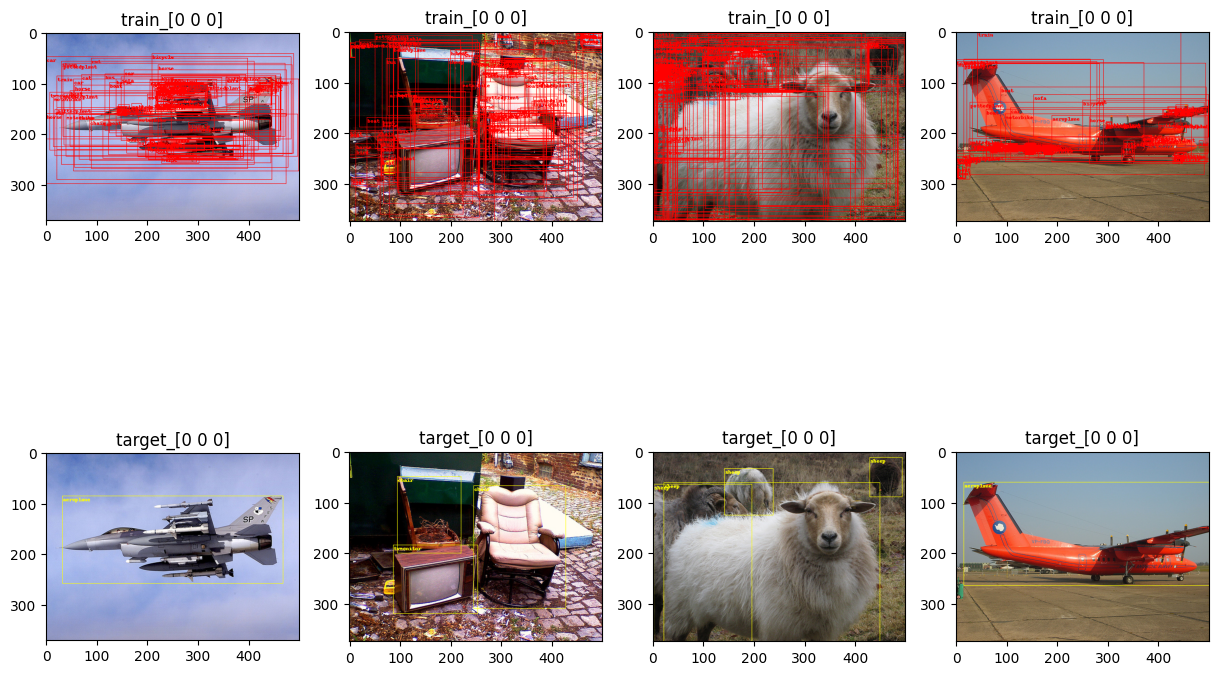

In [26]:
# Lets see how many boxes model returns and how many boxes actually

print(f"Boxes predicted = {len(prediction[0]['boxes'])}")
print(f"Boxes inplace = {len(y_sample[0]['boxes'])}")
get_education_pic(x_sample,prediction,y_sample,torch.tensor([0,0,0]))

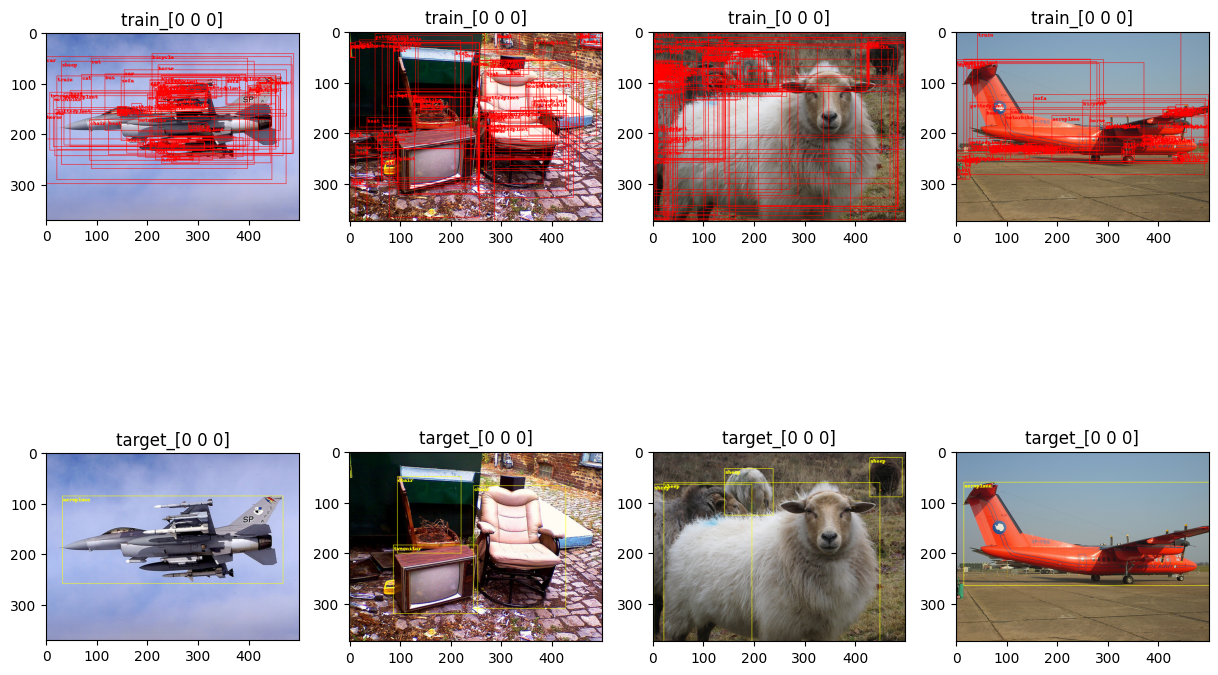

In [27]:
model.eval()
prediction = model(x_sample)

for idx,pic in enumerate(prediction):
    prediction[idx] = apply_nms(pic)

get_education_pic(x_sample,prediction,y_sample,torch.tensor([0,0,0]))

In [209]:
for epoch in range(3):
    
    train(model)
    
    map_ = evaluate(model,train_loader)
    print(f"Epoch number = {epoch}, score = {map_}")
    
    #x_s,y_s = next(iter(train_loader))
    
    #x_s = [x.to(device) for x in x_s]
    #y_s = [{k: v.to(device) for k, v in t.items()} for t in y_s] 
    
    #prediction = model(x_s)
    
    #get_education_pic(x_s,prediction,y_s,map_)

Evaluation: 100%|██████████| 715/715 [02:01<00:00,  5.91it/s]


Epoch number = 0, score = 0.25437676906585693


Evaluation: 100%|██████████| 715/715 [02:00<00:00,  5.92it/s]


Epoch number = 1, score = 0.2395007163286209


Evaluation: 100%|██████████| 715/715 [02:00<00:00,  5.92it/s]


Epoch number = 2, score = 0.24247868359088898


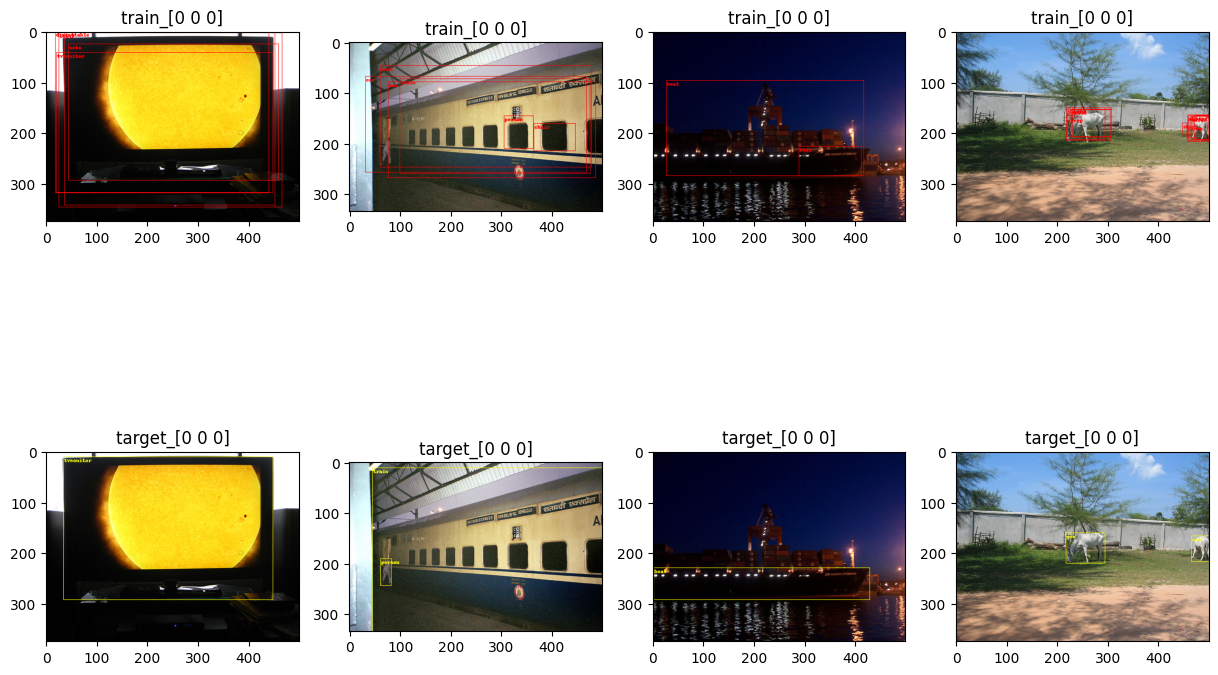

In [228]:
x_s = [x.to(device) for x in x_s]
y_s = [{k: v.cpu() for k, v in t.items()} for t in y_s]

model.eval()
prediction = model(x_s)

for idx,pic in enumerate(prediction):
    prediction[idx] = apply_nms(pic)

get_education_pic(x_s,prediction,y_s,torch.tensor([0,0,0]))

In [32]:
def prep_picture_web(url:str,size_in_pixels = [500,422]):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    to_tensor = T.ToTensor()
    to_PIL = T.ToPILImage()
    tensord_img = to_tensor(img)
    r = Resize(size_in_pixels)
    return to_PIL(r.forward(tensord_img))

In [33]:
import requests
from io import BytesIO
from PIL import Image

url = "https://png.pngtree.com/thumb_back/fw800/background/20230610/pngtree-picture-of-a-blue-bird-on-a-black-background-image_2937385.jpg"
pic = prep_picture_web(url)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e7c4d859620>

# Тестируем

In [215]:
show_boxes(dataset_test[288][0])

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

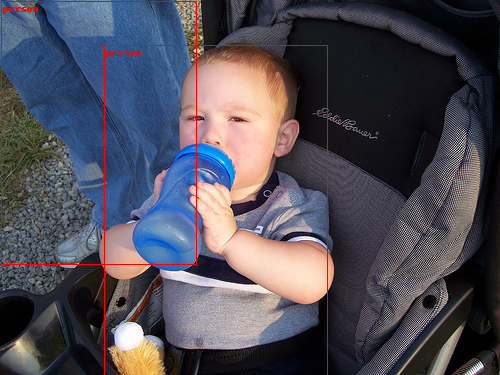

In [156]:
show_boxes(dataset[229])

In [157]:
pic = dataset[229][0]
tensored_pic = to_tensor(pic)
tensored_pic = tensored_pic.unsqueeze(0)
tensored_pic = tensored_pic.to(device)

In [158]:
# get prediction from the model
model.eval()
prediction = model(tensored_pic)[0]
prediction = apply_nms(prediction, iou_thresh=0.1)

In [159]:
s_tensored_pic = tensored_pic*255
s_tensored_pic = s_tensored_pic.to(torch.uint8)
s_tensored_pic = s_tensored_pic.squeeze(0)

In [160]:
s_tensored_pic.size()

torch.Size([3, 375, 500])

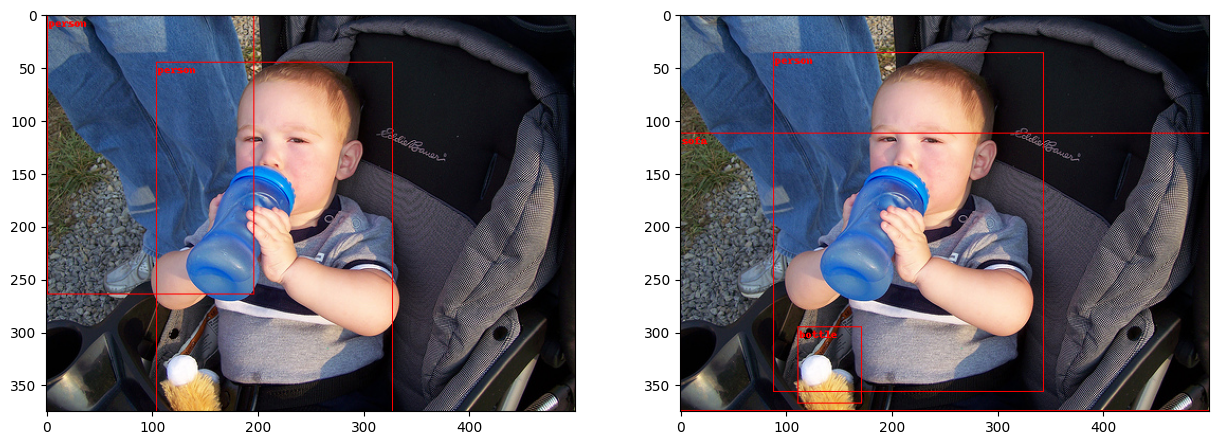

In [161]:
labels = [idx2target[i] for i in prediction['labels'].cpu().numpy()]
img_tensored_prediction = draw_bounding_boxes(s_tensored_pic,prediction['boxes'],labels,colors = ['red' for _ in labels])


# Ploting

plt.figure(figsize = (15,20))

plt.subplot(1,2,1)
plt.imshow(show_boxes(dataset[229]))

plt.subplot(1,2,2)
plt.imshow(to_pil(img_tensored_prediction))


In [163]:
def prep_picture(file_path:str,size_in_pixels:list):
    img = plt.imread(file_path)
    to_tensor = T.ToTensor()
    to_PIL = T.ToPILImage()
    tensord_img = to_tensor(img)
    r = Resize(size_in_pixels)
    return to_PIL(r.forward(tensord_img))

In [167]:
from torchvision.transforms import Resize
pil_img_1 = prep_picture("/kaggle/input/pics-1387/vovan_kulichenko.jpg",[500,600])

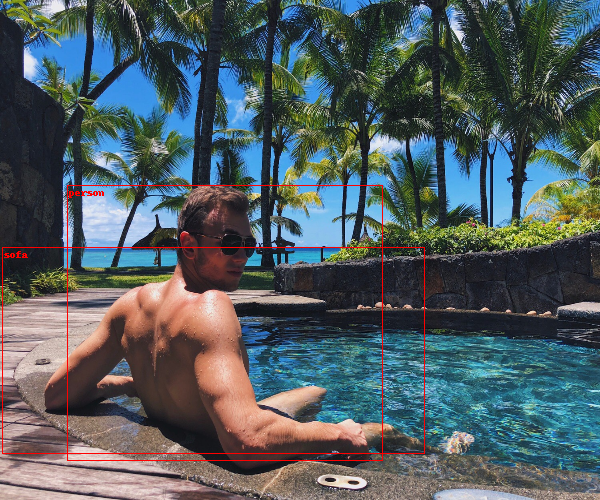

In [169]:
tensored_pic = to_tensor(pil_img_1)
tensored_pic = tensored_pic.unsqueeze(0)
tensored_pic = tensored_pic.to(device)

model.eval()
prediction = model(tensored_pic)[0]
prediction = apply_nms(prediction, iou_thresh=0.1)

s_tensored_pic = tensored_pic*255
s_tensored_pic = s_tensored_pic.to(torch.uint8)
s_tensored_pic = s_tensored_pic.squeeze(0)

labels = [idx2target[i] for i in prediction['labels'].cpu().numpy()]
img_tensored_prediction = draw_bounding_boxes(s_tensored_pic,prediction['boxes'],labels,colors = ['red' for _ in labels])

to_pil(img_tensored_prediction)

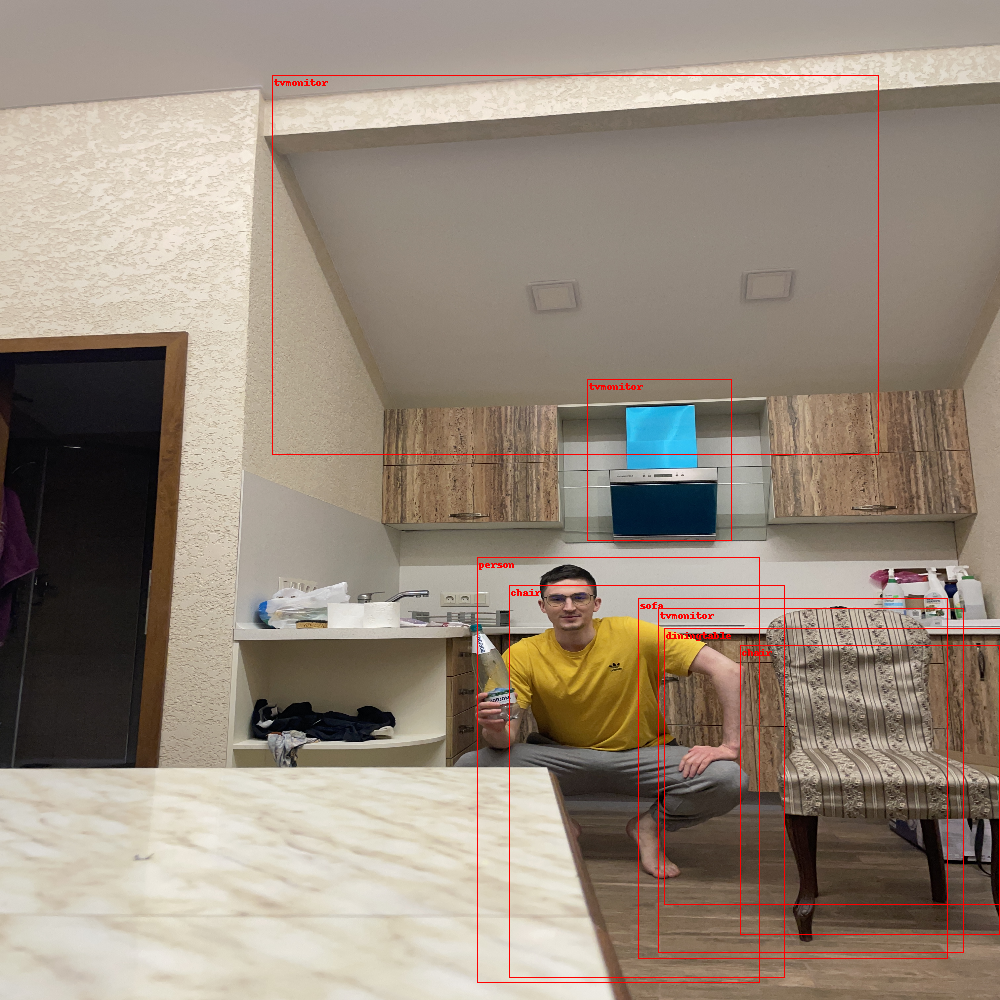

In [177]:
pil_img_1 = prep_picture("/kaggle/input/pics-1387/kitchen_picture.JPG",[1000,1000])
pil_img_1 = pil_img_1.rotate(270)
tensored_pic = to_tensor(pil_img_1)
tensored_pic = tensored_pic.unsqueeze(0)
tensored_pic = tensored_pic.to(device)

model.eval()
prediction = model(tensored_pic)[0]
prediction = apply_nms(prediction, iou_thresh=0.1)

s_tensored_pic = tensored_pic*255
s_tensored_pic = s_tensored_pic.to(torch.uint8)
s_tensored_pic = s_tensored_pic.squeeze(0)

labels = [idx2target[i] for i in prediction['labels'].cpu().numpy()]
img_tensored_prediction = draw_bounding_boxes(s_tensored_pic,prediction['boxes'],labels,colors = ['red' for _ in labels])

to_pil(img_tensored_prediction)

# Чтобы сохранить модель

In [162]:
torch.save(model.state_dict(), "img_recog_model_r")